# Is it Real? Or is it Random?

#### A Financial Turing Test of the JSE

An R/Finance talk by Stuart Reid, Chief Engineer [@NMRQL](http://www.nmrql.com) and Blogger [@TuringFinance](http://www.turingfinance.com)

# BACKGROUND INFORMATION

There is a legend that Professor Burton G. Malkiel, author of _A Random Walk Down Wall Street_, constructed a price chart by flipping a coin and presented it to a world-renowned chartist to analyze. The chartist studied the movements of the fictitious security and exclaimed that it was a textbook pattern and a once-in-a-lifetime opportunity ...

### Can you guess which one is the coin?

![A Financial Turing Test](http://www.turingfinance.com/wp-content/uploads/2016/11/RealOrRandom2.png "A Financial Turing Test")

## The Random Walk Hypothesis

The Random Walk Hypothesis is a 116-year-old _empirical assumption_ that security prices can be modelled by a random walk, a stochastic process.

The Random Walk Hypothesis is not an economic theory nor is it even an assertion that markets are _literally_ random. It is merely an assumption.

And it is an assumption which lies at the heart of everything we quants hold dear: **risk metrics**, **derivatives**, **mean variance optimization**, even **sharpe ratios!**

It was only in the 1970's that the _empirical assumption_ of randomness was finally justified by an _economic theory_ called the Efficient Market Hypothesis. 

The Nobel-prize worthy Efficient Market Hypothesis explained the Random Walk Assumption using the counter-intuitive lexicon of classical Information Theory.

## Classical Information Theory

Consider the following two binary strings,

* "1111111111111111111111111111111111111..."
* "1101000101001000100010000100110100110..."

Which string contains more information? 

The first string contains almost no information because all of the bits are exactly the same ad infinitum. Knowing one bit is sufficient to know what every other bit will be. 

The first string is called _determinstic_, _predictable_, or simply just _boring_.

The second string contains lots of information because knowing one bit does not seem to be sufficient to know what any other bit will most likely be. 

The second string is called _stochastic_, _unpredictable_, or simply just _interesting_.

## The Efficient Market Hypothesis

The Efficient Market Hypothesis argues that investors trading on new information reflect that informaton into the price of the security thereby making it more random; the Random Walk Hypothesis is a byproduct of participation by many _intelligent_ agents.

The Efficient Market Hypothesis is an _Economic Theory_ because it allows for investors to be reimbursed for taking on risk when they invest in the market. This return, called the market risk premium, is the expected rate of return of a diversified portfolio. This premium explains why buy-and-hold investors and index funds have a non-zero expected return!

So when proponents of the Efficient Market Hypothesis say _"active investors can't beat the market"_ what they really meant to say is that _"active investors can't generate returns above the market risk premium with less risk than the market (a.k.a abnormal returns)"_

## The Three Forms of EMH

The Efficient Market Hypothesis distinguishes between three forms of market efficiency: weak-form, semi-strong-form, and strong-form. These differ according to the set of information, $\Phi$, which is reflected by investors into the price of securities,

* $\Phi_{weak} = \{\textrm{Historical Price Data}\}$
* $\Phi_{semi-strong} = \{\textrm{All Public Information}\}$
* $\Phi_{strong} = \{\textrm{All Information incl. Non-Public}\}$

The Random Walk Hypothesis typically deals with just the first form of market efficiency, but theoretically it could be used to test the hypothesis that the market is efficient with respect to any subset of information, $\Phi_i$. More on that later ...

## Getting to Martingales from EMH

If the current price of a security reflects all historical price data, then the expected return of the market _with respect to_ historical price data is the just yesterday's price,

$E[S_{t+1}|\Phi_{weak}] = S_{t}$ or alternatively,

Let $r = ln\Big(\frac{S_{t+1}}{S_{t}}\Big)$ then,

$E[r_{t+1}|\Phi_{weak}] = ln\Big(\frac{E[S_{t+1}]}{S_{t}}\Big) = ln(S_{t}/S_{t}) = ln(1) = 0$

The above model is called a Martingale and it is the purest type of random walk! But, it does not reflect the equity risk premium ...

## Getting to Submartingales from EMH

If the current price of a security reflects all historical price data, then the expected return of the market _with respect to_ historical price data greater than yesterday's price because securities are _risky_ assets and we should be rewarded for taking on that risk,

$E[S_{t+1}|\Phi_{weak}] \geq S_{t}$ or alternatively,

$E[r_{t+1}|\Phi_{weak}] \geq  0$

This is called a Submartingale random walk and it is the underlying assumption of most quantitative models. The Submartingale Random Walk Hypothesis is a _consequent_ of the Efficient Market Hypothesis which is the _consequent_ of active investment,

$\textbf{Intelligent Investors} \rightarrow \textbf{Efficient Market} \rightarrow \textbf{Random Walks}$

## A Comment on Models

One, often overlooked, aspect of market efficiency is the set of models, $\mathcal{M}$, used by investors. Consider that "random string" we looked at earlier, "1101000101001000100010000100110100110", and now consider the below model:

In [1]:
model <- function(binstr) {
    sum(2^(which(rev(unlist(strsplit(as.character(binstr), "")) == 1))-1))
}
print(model("1101000101001000100010000100110100110"))

[1] 112358132134


Does it look familiar? 1, 1, 2, 3, 5, 8, 13, 21, 34, ... The sequence may look random to our mental model in binary, but to our model above it is decidedly **not random**! Therefore models are an important aspect of market efficiency,

Quantitative investing is the belief that with respect to any set of information, $\Phi_{i}$, and some set of models, $\mathcal{M}$, security prices consist of a _signal component_ and a _noise component_. So for some combinations of $\Phi_{i}$ and $\mathcal{M}$ the market may be totally random, but for some other combinations of $\Phi_{i}$ and $\mathcal{M}$ is may only be semi-random. 

Quantitative investors try to find combinations of $\Phi_{i}$ and $\mathcal{M}$ that reduce the randomness of the security we are trading. We seek information-rich data and build powerful models.

# RANDOMNESS TESTING

## What Kind?

If the markets are random walks, what type of random walk are they? 

Generally speaking you get two types of randomness tests: parametric and nonparametric. 

* Parametric tests assume something about the underlying distribution 
* Nonparametric tests don't assume anything about the underlying distribution

A good test of the random walk hypothesis makes few assumptions about the data ... but may, as a result, be less powerful than another more specific test. 

This, and biases in randomness tests, are the reason why I believe we should ensemble randomness tests together when testing the random walk hypothesis.

## What Frequency?

And if the markets are random walks, are they random in all frequencies?

Most statistical tests of randomness are conducted on returns computed over a specific period of time, usually daily. But just because daily returns are random doesn't automatically imply that weekly or monthly returns are random too.

As such most randomness tests are conducted in multiple frequencies or rather, across multiple lags. Eugene Fama's original paper looked at lags from one to ten days. 

All of these issues are what inspired me to write the emh package for R. This package, which we will be going through shortly, makes it increadibly easy to run a suite of randomness tests on a financial time series object and extract the results of each test in the suite on the data sampled at different frequencies. To install the package just type,

In [2]:
library(devtools)
suppressMessages(devtools::install_github(repo="stuartgordonreid/emh", 
                                          force = TRUE))
suppressMessages(library(emh))

# THE RANDOMNESS TESTS

## The Runs Test

## The Durbin-Waton Test

## The Ljung-Box Test

## The Breusch-Godfrey Test

## The Bartel Variance Ratio Test

## The Lo-MacKinlay Variance Ratio Test

# RESULTS ON THE MARKET

In [3]:
suppressMessages(library(Quandl))
Quandl.api_key("t6Rn1d5N1W6Qt4jJq_zC")
suppressMessages(library(PerformanceAnalytics))

## Benchmark 1, Geometric Brownian Motion

In [4]:
gbm_walk <- emh::simulate_brownian_motion(drift = 0.1, n = 3780)
gbm_walk <- emh::as_levels(zoo(gbm_walk, seq.Date(Sys.Date(), Sys.Date() + 3779, 1)))

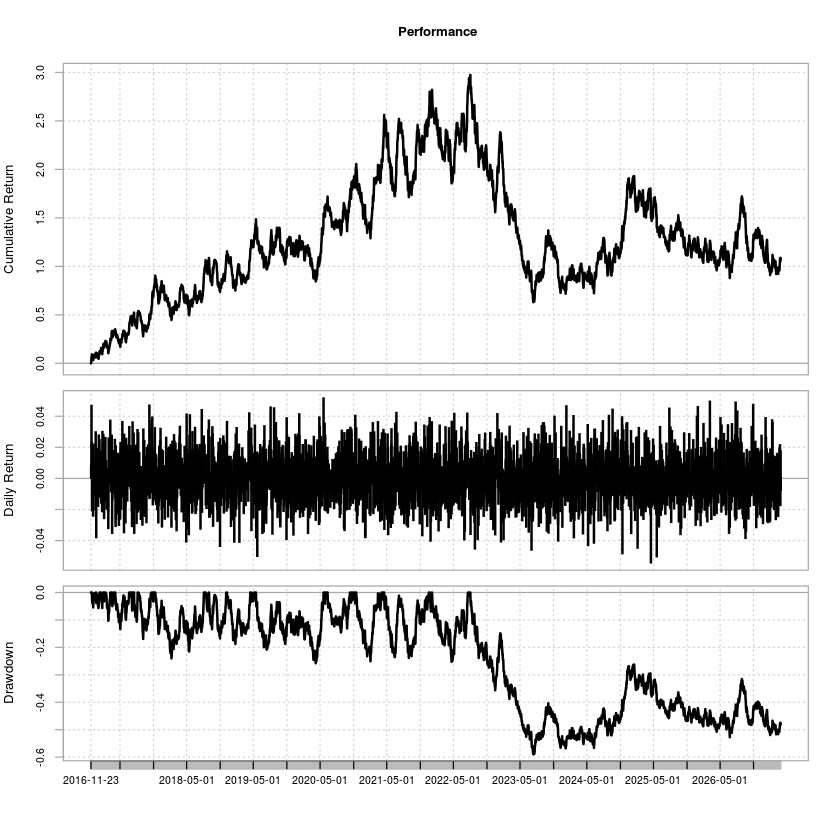

In [5]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(gbm_walk))

In [6]:
randomness_results_gbmwalk <- emh::is_random(gbm_walk, a = 0.9999,
                                             freqs1  = seq(1, 20),
                                             freqs2 = c("Mon", "Tue", "Wed", 
                                                        "Thu", "Fri", "Week"))

  |======================================================================| 100%

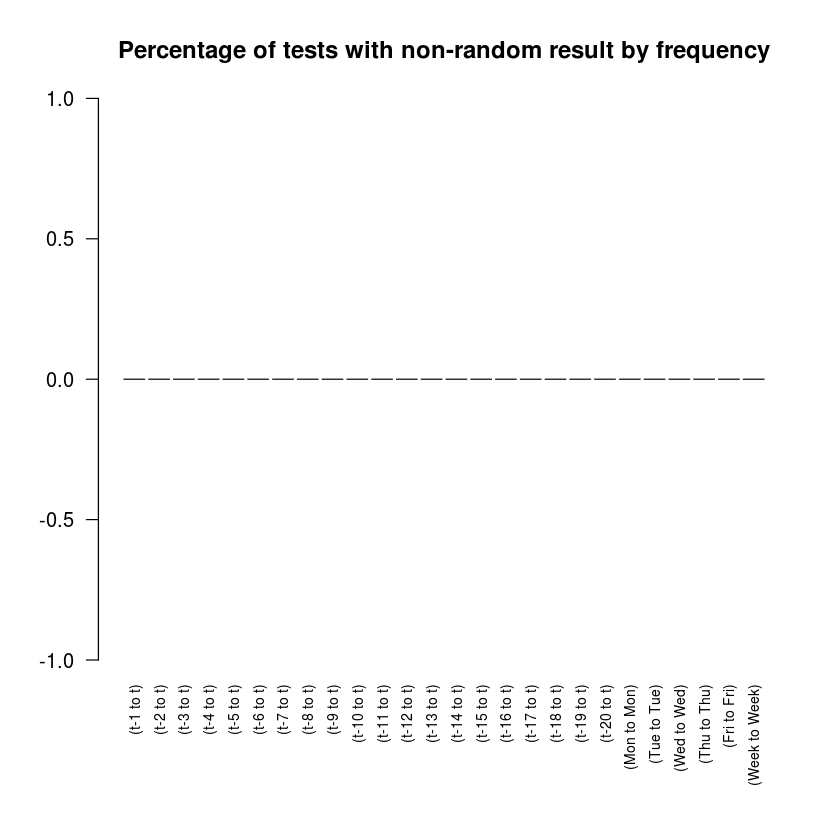

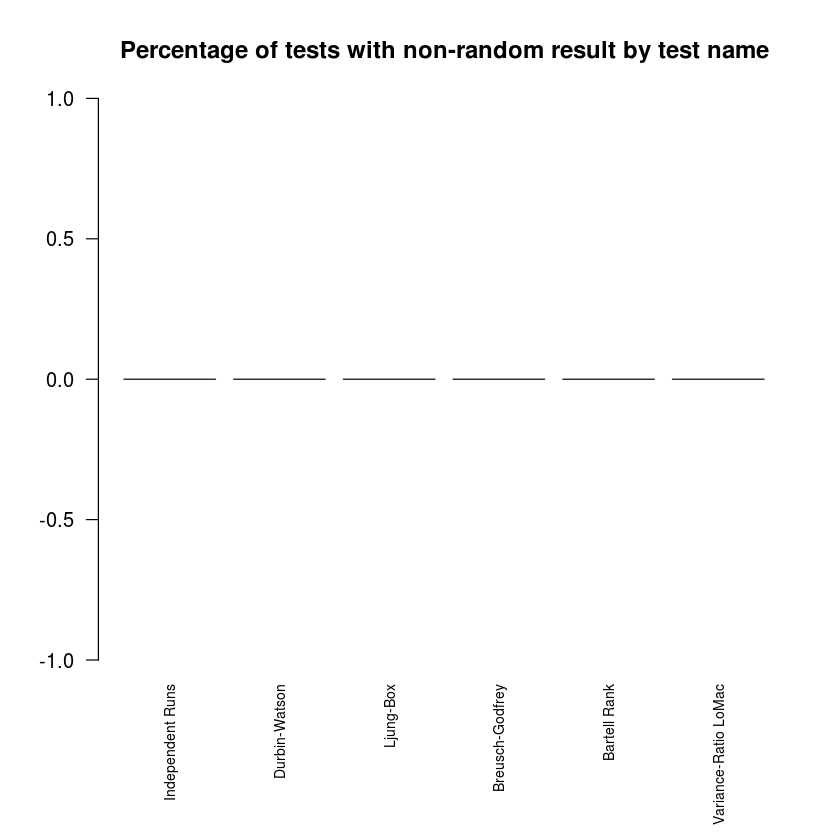

In [7]:
emh::plot_results(randomness_results_gbmwalk)

## Benchmark 2, Merton Jump Diffusion Model

In [8]:
jump_walk <- emh::simulate_merton_model(drift = 0.1, n = 3780, jlambda = 0.4)
jump_walk <- emh::as_levels(zoo(jump_walk, seq.Date(Sys.Date(), Sys.Date() + 3779, 1)))

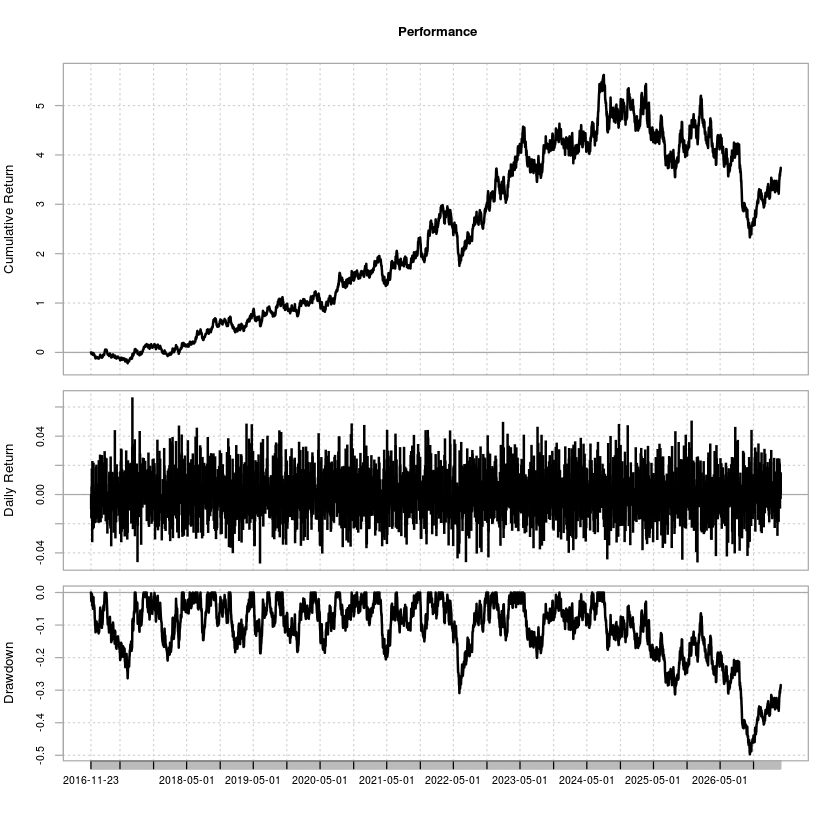

In [9]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(jump_walk))

In [10]:
randomness_results_jumpwalk <- emh::is_random(jump_walk, a = 0.9999,
                                              freqs1  = seq(1, 20),
                                              freqs2 = c("Mon", "Tue", "Wed", 
                                                         "Thu", "Fri", "Week"))

  |======================================================================| 100%

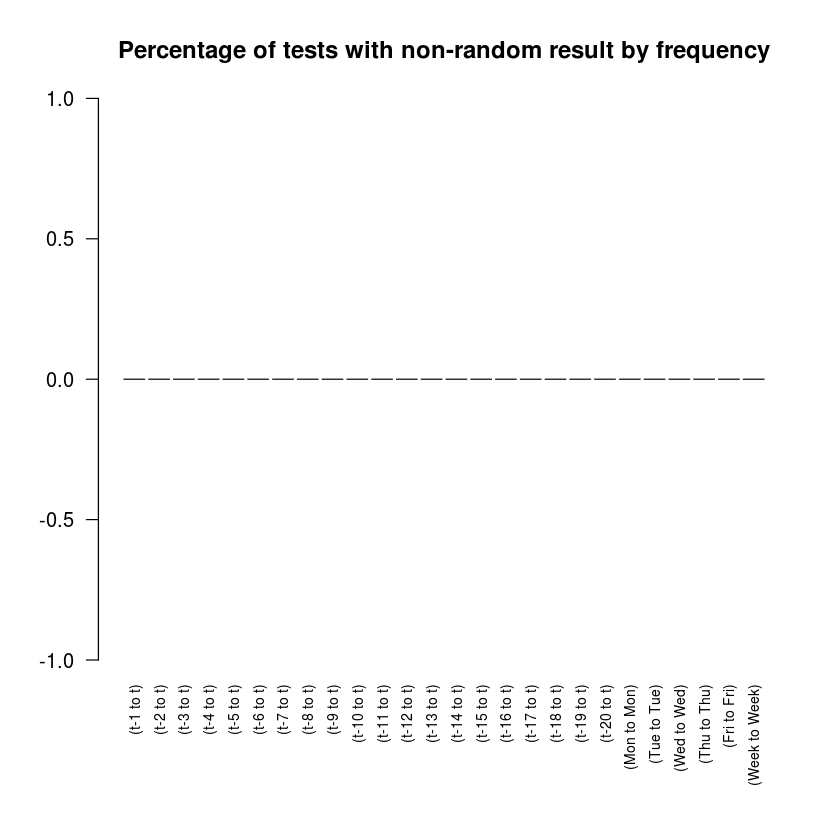

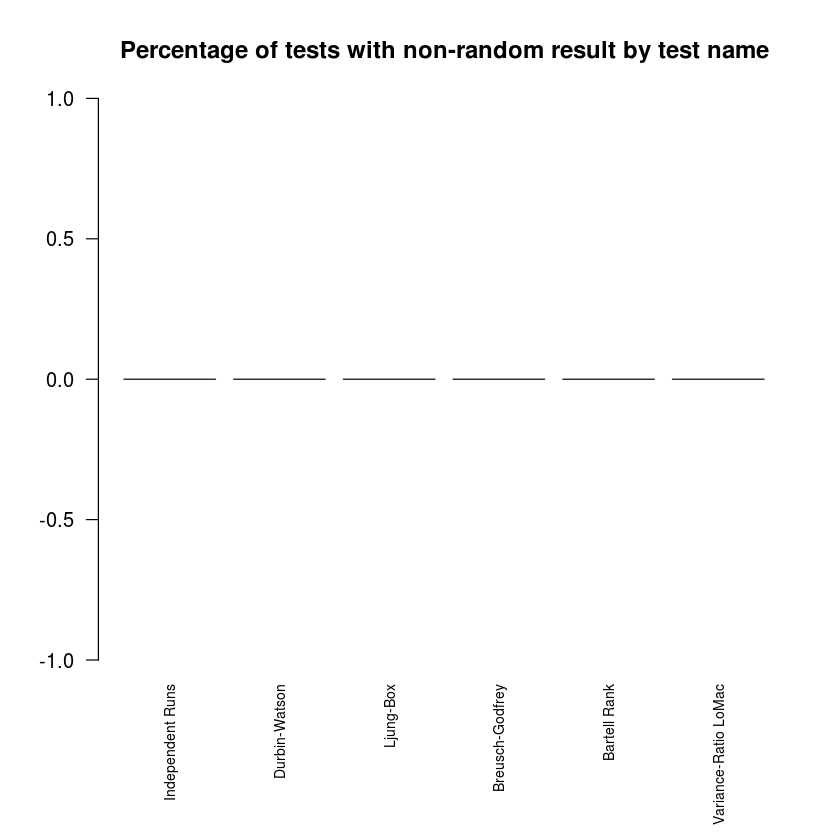

In [11]:
emh::plot_results(randomness_results_jumpwalk)

## Our Volatile Currency

In [12]:
usdzar <- Quandl("CURRFX/USDZAR", type = "zoo")$Rate

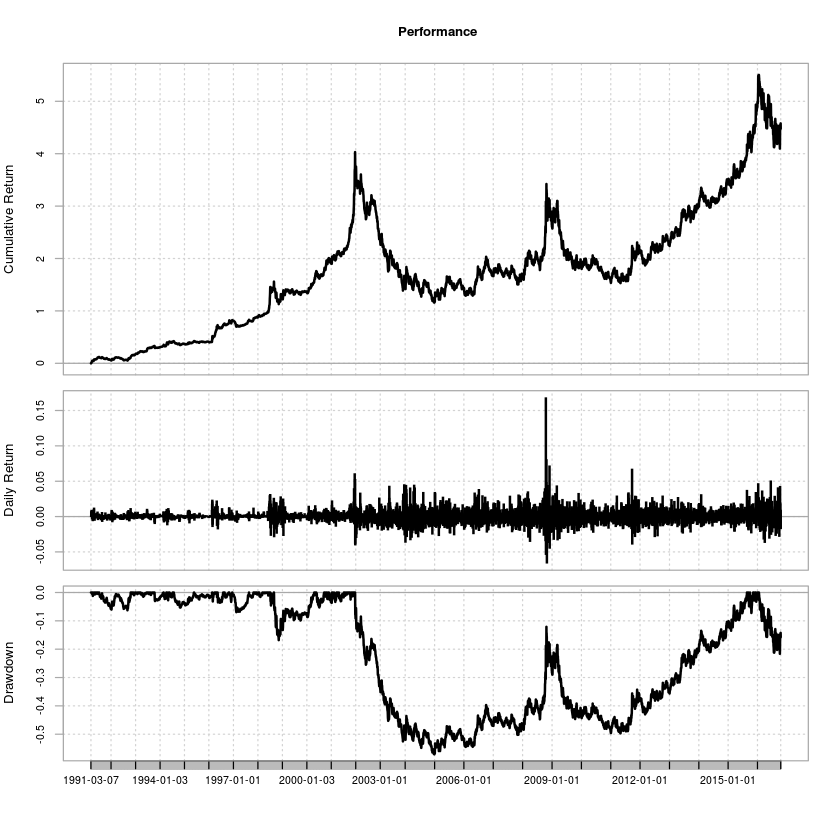

In [13]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(usdzar))

In [14]:
randomness_results_usdzar <- emh::is_random(usdzar, a = 0.9999,
                                            freqs1  = seq(1, 20),
                                            freqs2 = c("Mon", "Tue", "Wed", 
                                                       "Thu", "Fri", "Week"))

  |======================================================================| 100%

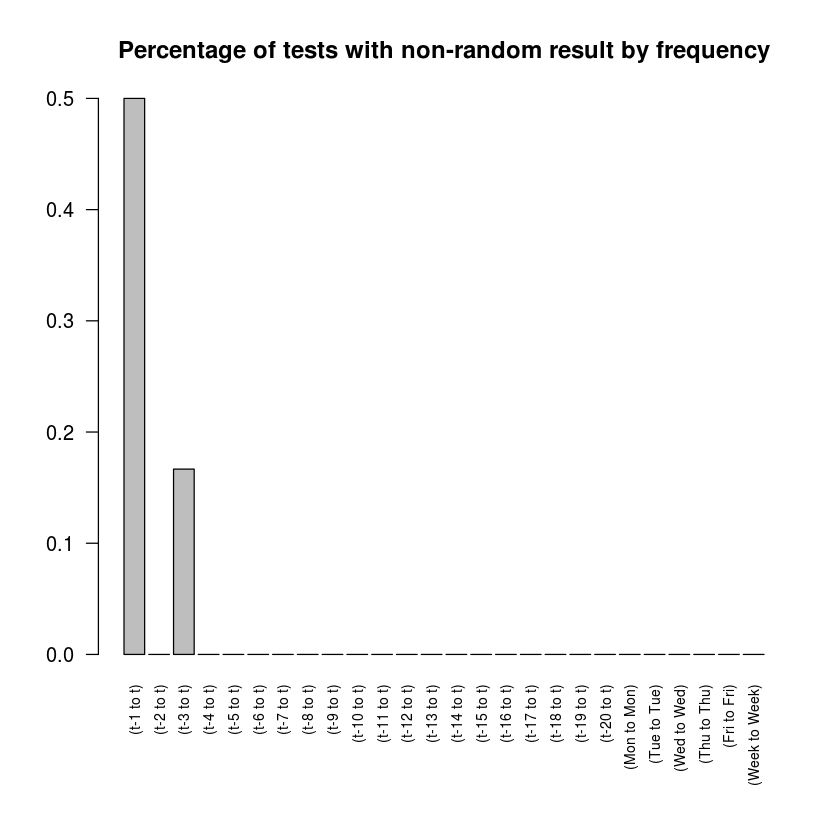

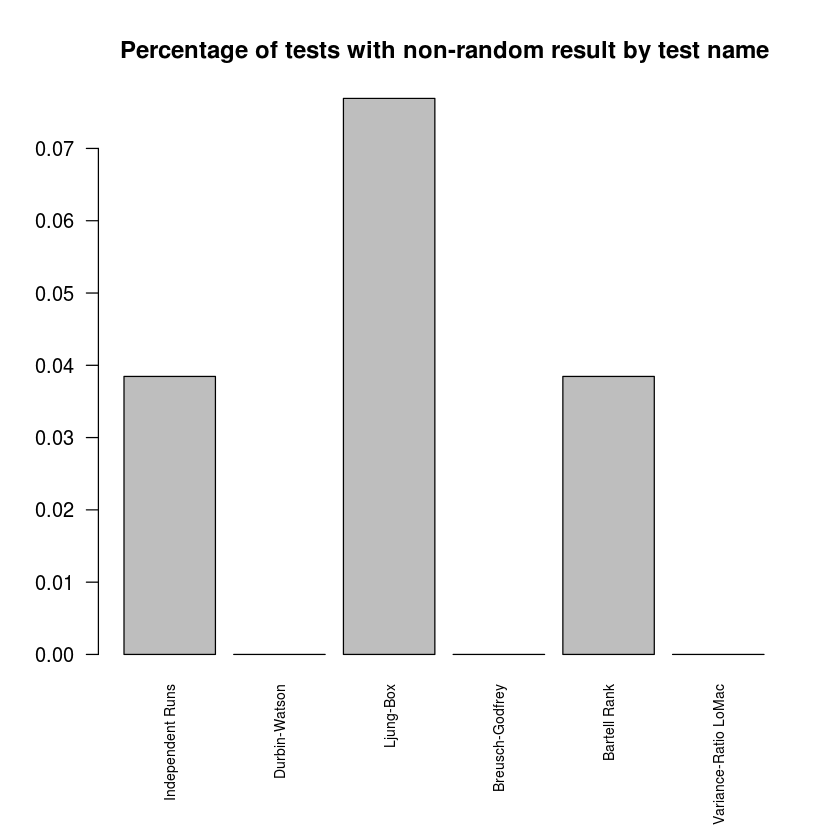

In [15]:
emh::plot_results(randomness_results_usdzar)

## The SATRIX Top 40

In [16]:
stx40 <- Quandl("GOOG/JSE_STX40", type = "zoo")$Close

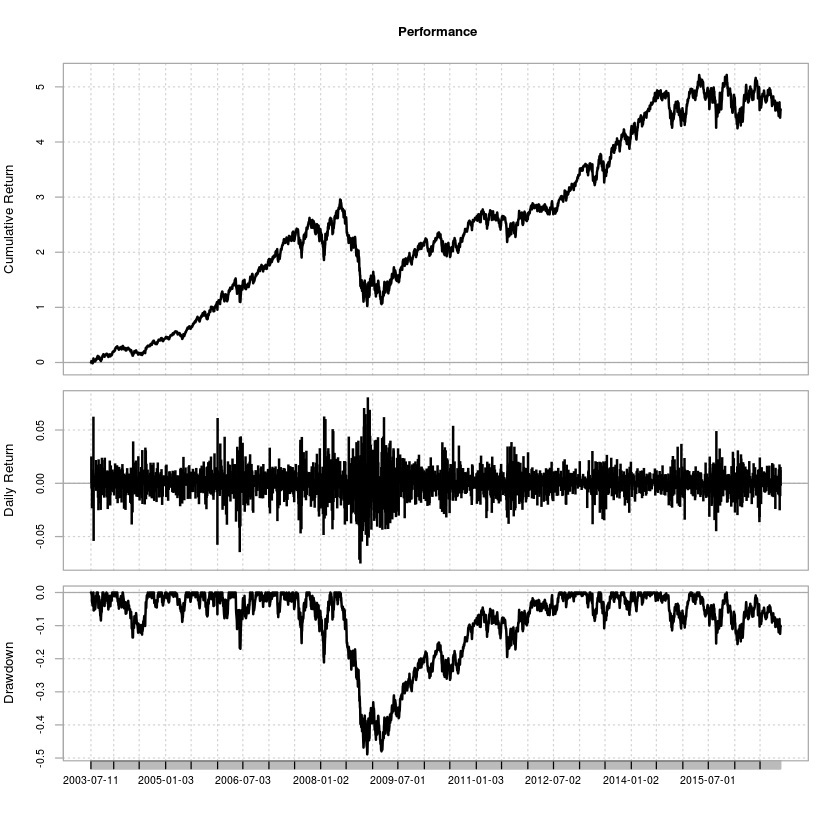

In [17]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(stx40))

In [18]:
randomness_results_stx40 <- emh::is_random(stx40, a = 0.9999,
                                           freqs1  = seq(1, 20),
                                           freqs2 = c("Mon", "Tue", "Wed", 
                                                      "Thu", "Fri", "Week"))

  |======================================================================| 100%

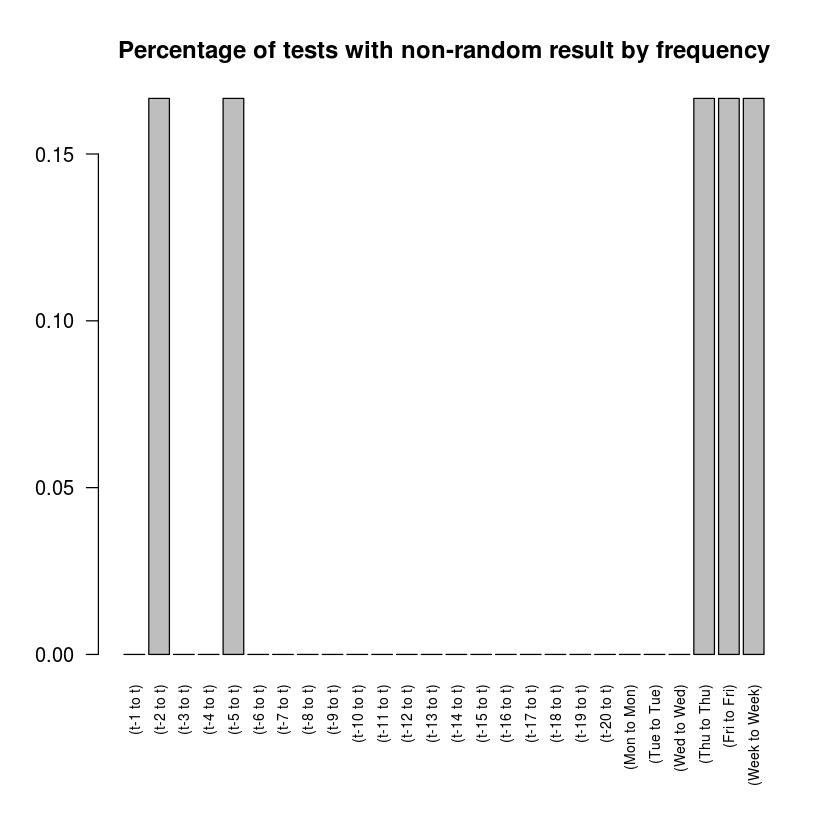

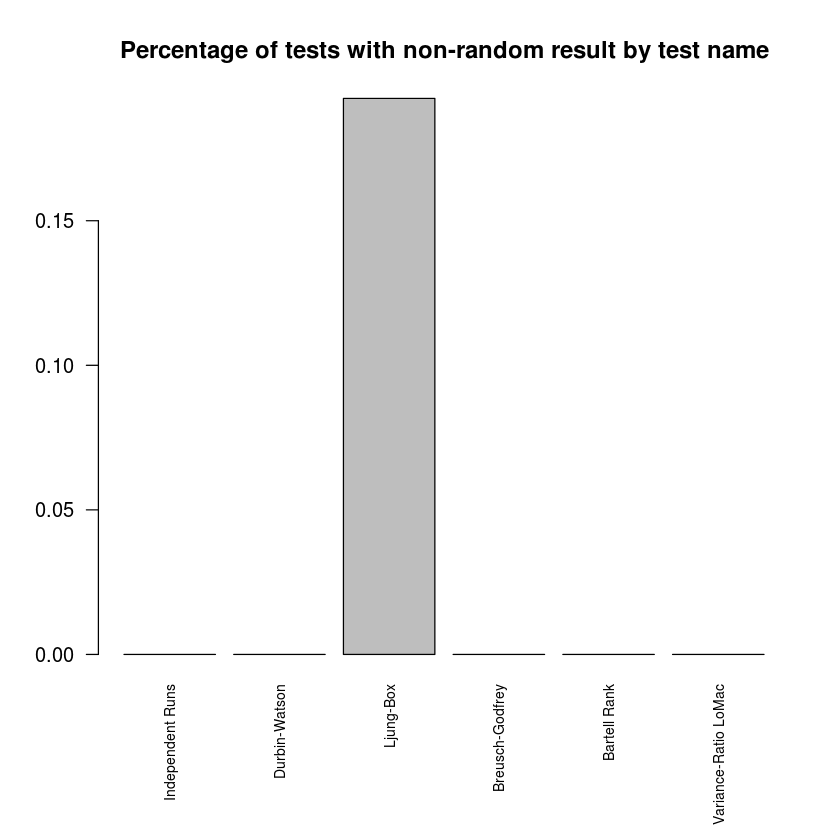

In [19]:
emh::plot_results(randomness_results_stx40)

## The SATRIX Financials Index

In [20]:
stxfin <- Quandl("GOOG/JSE_STXFIN", type = "zoo")$Close

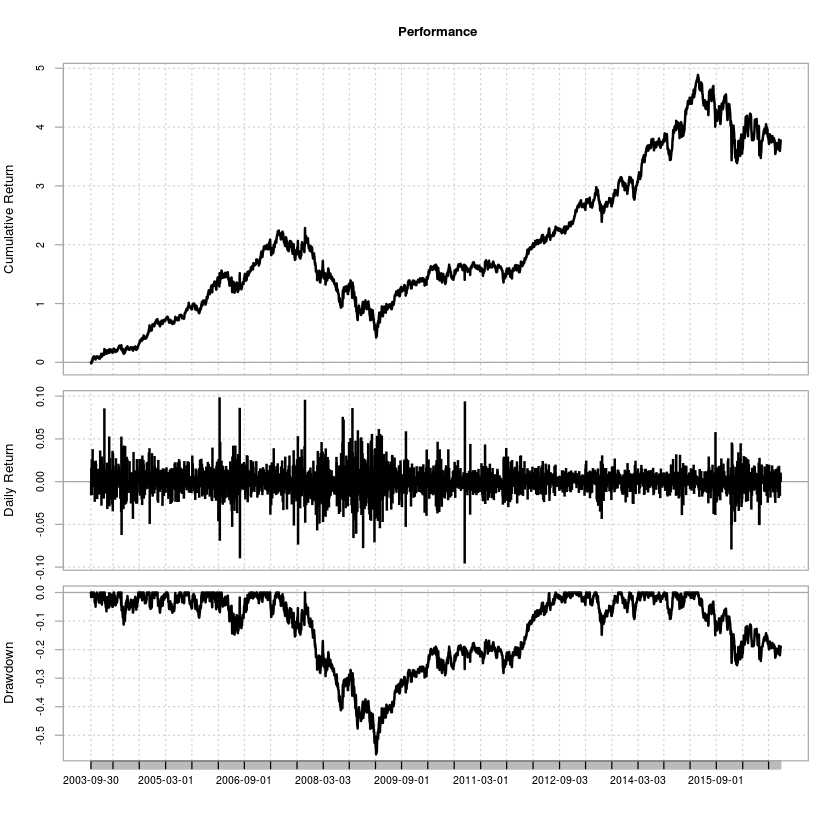

In [21]:
PerformanceAnalytics::charts.PerformanceSummary(emh::as_returns(stxfin))

In [22]:
randomness_results_stxfin <- emh::is_random(stxfin, a = 0.9999,
                                            freqs1  = seq(1, 20),
                                            freqs2 = c("Mon", "Tue", "Wed", 
                                                       "Thu", "Fri", "Week"))

  |======================================================================| 100%

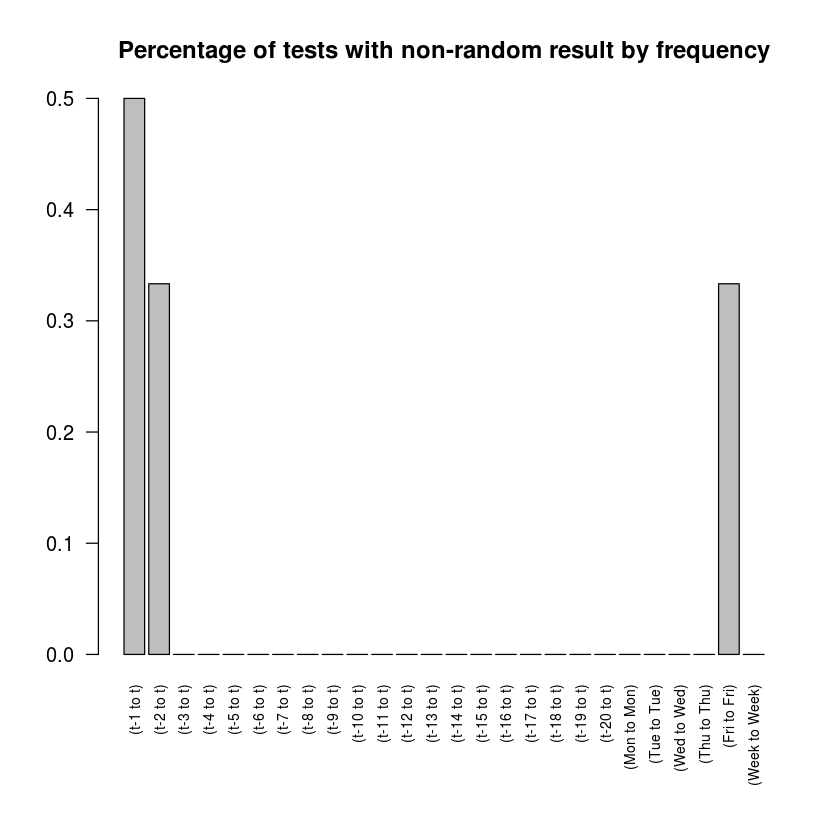

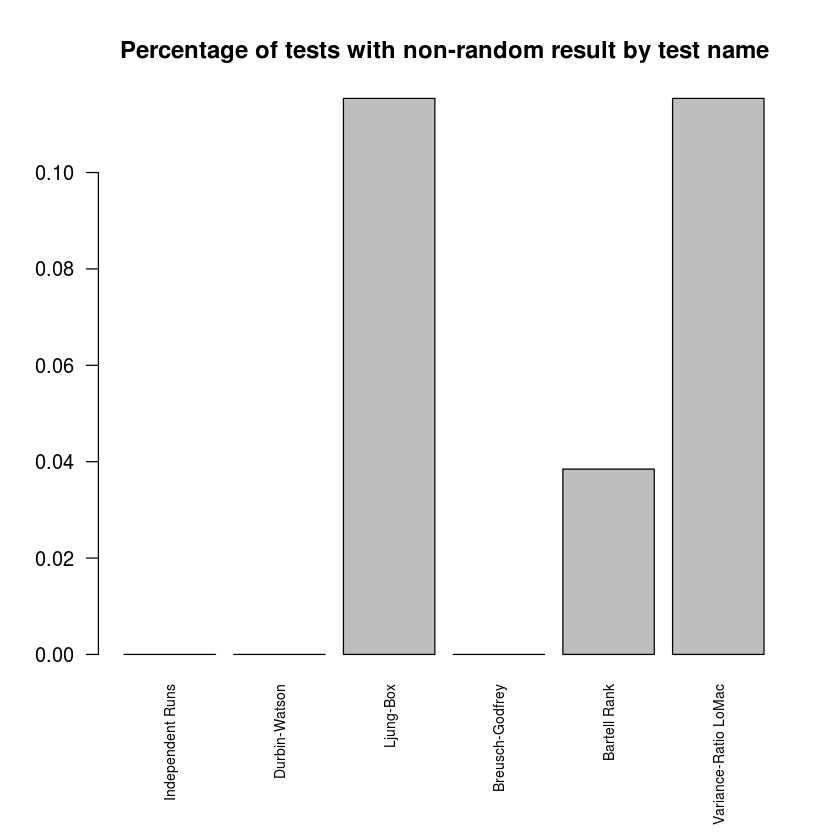

In [23]:
emh::plot_results(randomness_results_stxfin)